In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
df= pd.read_csv('driver-data.csv')

In [3]:
df.shape

(4000, 3)

In [4]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
features= df.drop('id',axis=1)

In [6]:
features

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
...,...,...
3995,160.04,10
3996,176.17,5
3997,170.91,12
3998,176.14,5


In [7]:
kmeans=KMeans(n_clusters=3)

In [8]:
cluster=kmeans.fit(features)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
np.unique(cluster.labels_)

array([0, 1, 2])

In [10]:
cluster.labels_.shape

(4000,)

In [11]:
df['cluster']= cluster.labels_

In [12]:
df

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,1
1,3423313212,52.53,25,1
2,3423313724,64.54,27,1
3,3423311373,55.69,22,1
4,3423310999,54.58,25,1
...,...,...,...,...
3995,3423310685,160.04,10,0
3996,3423312600,176.17,5,0
3997,3423312921,170.91,12,0
3998,3423313630,176.14,5,0


In [13]:
df[df.cluster==2]

,id,mean_dist_day,mean_over_speed_perc,cluster
3200,3423314190,179.22,95,2
3201,3423314144,192.34,69,2
3202,3423314442,140.25,92,2
3203,3423313001,184.28,70,2
3204,3423311047,200.58,50,2
...,...,...,...,...
3315,3423313871,177.20,87,2
3316,3423310955,182.40,83,2
3317,3423314016,189.88,97,2
3318,3423310913,214.17,73,2


In [14]:
cluster.cluster_centers_

array([[180.34311782,  10.52011494],
       [ 50.04763438,   8.82875   ],
       [177.83509615,  70.28846154]])

C:\Users\excel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


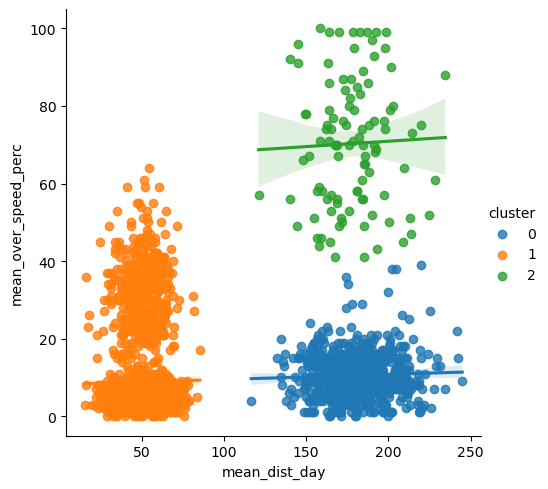

In [15]:
sns.lmplot(data=df,x='mean_dist_day',y='mean_over_speed_perc',hue='cluster')

In [16]:
cluster.inertia_

992634.0606702475

In [40]:
a=np.array([2,1,2,3,2,9])
b=np.array([3,4,2,4,5,5])

In [18]:
from numpy.linalg import norm

In [19]:
np.dot(a,b)/(norm(a)*norm(b))

0.8188504723485274

In [20]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
df= pd.DataFrame(a,columns=['a'])

In [22]:
df['b']=b

In [23]:
new=cosine_similarity(df)

In [24]:
df1=1-pairwise_distances(df,metric='cosine')
df1

array([[1.        , 0.94174191, 0.98058068, 0.99846035, 0.97854978,
        0.88897456],
       [0.94174191, 1.        , 0.85749293, 0.92163538, 0.99083017,
        0.68315713],
       [0.98058068, 0.85749293, 1.        , 0.98994949, 0.91914503,
        0.96152395],
       [0.99846035, 0.92163538, 0.98994949, 1.        , 0.96561576,
        0.91300871],
       [0.97854978, 0.99083017, 0.91914503, 0.96561576, 1.        ,
        0.775562  ],
       [0.88897456, 0.68315713, 0.96152395, 0.91300871, 0.775562  ,
        1.        ]])

In [25]:
import math

In [28]:
a=[1]
b=[4]

In [29]:
math.dist(a,b)

3.0

In [30]:
from scipy.spatial.distance import pdist,squareform

In [31]:
new1= new.mean(axis=1)

In [32]:
item= new-new1

In [38]:
1-squareform(pdist(df.values.T,'cosine'))

array([[1.        , 0.81885047],
       [0.81885047, 1.        ]])

In [39]:
a

[1]

In [42]:
mean_a= np.mean(a)
mean_b= np.mean(b)

In [45]:
norm_a= a-mean_a
norm_b= b-mean_b

In [46]:
norm_b

array([-0.83333333,  0.16666667, -1.83333333,  0.16666667,  1.16666667,
        1.16666667])

In [47]:
norm_a

array([-1.16666667, -2.16666667, -1.16666667, -0.16666667, -1.16666667,
        5.83333333])

In [48]:
df= pd.DataFrame(norm_a,columns=['a'])
df['b']=norm_b

In [49]:
cosine_similarity(df)

array([[ 1.        ,  0.76675767,  0.92724184,  0.16439899,  0.16439899,
        -0.91192151],
       [ 0.76675767,  1.        ,  0.47058824,  0.7592566 ,  0.7592566 ,
        -0.96265094],
       [ 0.92724184,  0.47058824,  1.        , -0.21693046, -0.21693046,
        -0.69190536],
       [ 0.16439899,  0.7592566 , -0.21693046,  1.        ,  1.        ,
        -0.5547002 ],
       [ 0.16439899,  0.7592566 , -0.21693046,  1.        ,  1.        ,
        -0.5547002 ],
       [-0.91192151, -0.96265094, -0.69190536, -0.5547002 , -0.5547002 ,
         1.        ]])

In [ ]:
from crab.met